#### Importing packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
tf.keras.backend.set_floatx('float64')
tf.autograph.set_verbosity(0)

#### Generate data

In [6]:
def gen_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
    x_ideal = x_train #for redraw when new data included in X
    return x_train, y_train, x_ideal, y_ideal

#### Splitting your dataset

In [7]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### Plot train

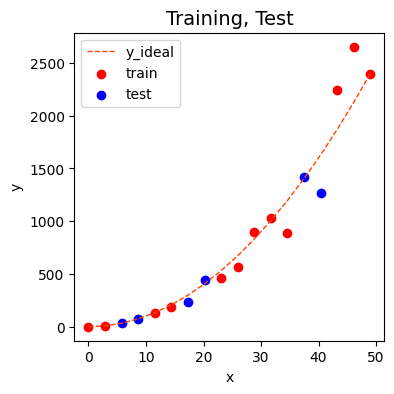

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

#### Error calculation for model evaluation, linear regression

In [11]:
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
       err += (y[i] - yhat[i])**2
    err = err / (2*m)
    
    return(err)

#### Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [12]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

NameError: name 'lin_model' is not defined

## Evaluating a Learning Algorithm (Neural Network)

#### Generate data

In [17]:
def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0], [1, 0], [0, 1], [0, -1],  [-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std)

#### Dataset

In [18]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


#### Evaluating categorical model by calculating classification error

In [19]:
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    cerr = 0
    m = len(y)
    incorrect = 0
    for i in range(m):
        if(y[i] != yhat[i]):
            incorrect += 1
    cerr = incorrect/m
    return(cerr)

#### Model Complexity
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [49]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(len(X_train[0]),)),
        Dense(120, activation='relu', name= "L1"),
        Dense(40, activation='relu', name="L2"),
        Dense(6, activation='linear', name="L3")
    ], name="Complex"
)
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01),
)

In [32]:
print("Shape of X_Train:",X_train.shape, " Shape of Y_train:", y_train.shape)
model.fit(X_train,y_train,epochs=1000)

Shape of X_Train: (400, 2)  Shape of Y_train: (400,)
Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.0558
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4076
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2629
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2874
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2472
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2231
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1970
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2145
Epoch 12/1000
13/13 [==============================] -

In [33]:
model.summary()

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 120)               360       
                                                                 
 L2 (Dense)                  (None, 40)                4840      
                                                                 
 L3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 2ms/step
categorization error, training, complex model: 0.005
categorization error, cv,       complex model: 0.106


#### Simple model
Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [47]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        tf.keras.Input(shape=(len(X_train[0]),)),
        Dense(6, activation='relu', name="L1"),
        Dense(6, activation='linear', name="L2")
    ], name = "Simple"
)
model_s.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01),
)

In [48]:
model_s.fit(
    X_train,y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.5688
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3361
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.1639
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9791
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7944
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6292
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5165
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4381
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3865
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3500
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3048
Epoch 13/1000
13/13 [====

In [46]:
model_s.summary()

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 2ms/step
categorization error, training, simple model, 0.070, complex model: 0.005
categorization error, cv,       simple model, 0.062, complex model: 0.106


#### Regularization
Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [52]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        tf.keras.Input(shape=(len(X_train[0]),)),
        Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6, activation='linear')
    ], name= "Regularization"
)
model_r.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(0.01),
)

In [53]:
model_r.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 4.4644
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6354
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3082
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0703
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 1.0027
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9603
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9390
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8800
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.8227
Epoch 10/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.7766
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7708
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7671
Epoch 13/1000
13/13 [====

In [54]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 3ms/step
categorization error, training, regularized: 0.072, simple model, 0.070, complex model: 0.005
categorization error, cv,       regularized: 0.069, simple model, 0.062, complex model: 0.106
